<a href="https://colab.research.google.com/github/tomeliud/Hypothyroidism-Prediction-in-Patients-using-Random-Forest-Decision-Tree-Gradient-Boosting-SVC-/blob/master/Hypothyroidism_Prediction_in_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothyroidism Prediction in Patients

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

## 1. Defining the Question

### a) Specifying the Question



1.  Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.







### b) Defining the Metric for Success

Build a model that is able to determine if a patient has Hypothroid or not with a accuracy of above 95%


### c) Understanding the context


Research is based on Thyroid patients, the data was collected by Nairobi Hospital during a clinical camp test

### d) Recording the Experimental Design




1.   Import Libraries
2.   Load the Dataset
3.   Data Cleaning
4.   EDA
5.   Modelling
6.   Evaluation of the Models



## 2. Reading the Data

In [ ]:
# Loading the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
hypo = pd.read_csv('/content/hypothyroid.csv')
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


## 3. Checking the Data

In [ ]:
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
hypo.shape

(3163, 26)

In [ ]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## 5. Tidying the Dataset

In [ ]:
# Check for null
hypo.isnull().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
TBG                          False
dtype: bool

In [ ]:
for i in hypo.columns:
  if hypo[i].dtype == 'object':
    print(hypo[i].value_counts())
    print('************************************')


negative       3012
hypothyroid     151
Name: status, dtype: int64
************************************
?     446
59     64
60     64
62     63
28     60
72     59
70     59
58     59
41     55
64     54
57     53
34     53
73     52
55     51
68     48
63     48
27     47
65     47
54     46
38     45
71     45
50     45
24     44
56     44
53     44
32     42
61     42
74     41
30     41
78     40
66     39
52     39
33     39
46     38
35     38
40     38
43     38
77     38
76     37
69     37
36     37
67     37
29     34
51     33
26     33
75     33
47     32
37     29
45     29
48     29
39     29
49     28
31     28
20     27
79     27
42     26
80     26
22     26
44     25
85     23
18     23
84     22
23     22
21     22
25     21
19     21
17     18
15     18
16     17
82     14
87     11
83     11
86     10
14      8
81      7
13      7
12      6
11      4
88      4
89      4
1       4
10      2
9       2
6       2
92      2
5       1
93      1
90      1
4       1
8     

In [ ]:
# Drop TBG because it has alot of ? values 
hypo.drop('TBG', 1, inplace=True)

In [ ]:
# Considered ? as null 
for i in hypo[['age','TSH','T3','TT4','T4U','FTI']]:
    hypo.drop(hypo[hypo[i] == '?'].index, inplace=True)

In [ ]:
#Convert the integers that have data type 'objects' into integers
hypo[['age','TSH','T3','TT4','T4U','FTI']] = hypo[['age','TSH','T3','TT4','T4U','FTI']].astype(float)

In [ ]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     2012 non-null   object 
 1   age                        2012 non-null   float64
 2   sex                        2012 non-null   object 
 3   on_thyroxine               2012 non-null   object 
 4   query_on_thyroxine         2012 non-null   object 
 5   on_antithyroid_medication  2012 non-null   object 
 6   thyroid_surgery            2012 non-null   object 
 7   query_hypothyroid          2012 non-null   object 
 8   query_hyperthyroid         2012 non-null   object 
 9   pregnant                   2012 non-null   object 
 10  sick                       2012 non-null   object 
 11  tumor                      2012 non-null   object 
 12  lithium                    2012 non-null   object 
 13  goitre                     2012 non-null   objec

In [ ]:
# Looking at our Categorical data

for i in hypo.columns:
  if hypo[i].dtype == 'object':
    print(hypo[i].value_counts())
    print('************************************')


negative       1890
hypothyroid     122
Name: status, dtype: int64
************************************
F    1361
M     639
?      12
Name: sex, dtype: int64
************************************
f    1752
t     260
Name: on_thyroxine, dtype: int64
************************************
f    1991
t      21
Name: query_on_thyroxine, dtype: int64
************************************
f    1985
t      27
Name: on_antithyroid_medication, dtype: int64
************************************
f    1940
t      72
Name: thyroid_surgery, dtype: int64
************************************
f    1859
t     153
Name: query_hypothyroid, dtype: int64
************************************
f    1868
t     144
Name: query_hyperthyroid, dtype: int64
************************************
f    1962
t      50
Name: pregnant, dtype: int64
************************************
f    1929
t      83
Name: sick, dtype: int64
************************************
f    1987
t      25
Name: tumor, dtype: int64
******************

In the Sex Column we have an Anomaly

In [ ]:
# convert the anomaly to null
hypo['sex']=hypo['sex'].replace(['?'],np.nan)
hypo['sex'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
# replace the null value with the mode 
hypo['sex'].fillna(hypo['sex'].mode()[0], inplace=True)
hypo['sex'].value_counts()

F    1373
M     639
Name: sex, dtype: int64

In [ ]:
# Drop columns with only one value
for col in hypo.columns:
    if hypo[col].nunique() == 1:
        hypo = hypo.drop(col, axis=1)
hypo.shape

(2012, 20)

In [ ]:
# drop TBG_measured
hypo.drop('TBG_measured',1,inplace=True)

In [ ]:
# Drop Duplicates
hypo.duplicated().any()

True

In [ ]:
hypo.drop_duplicates(inplace=True)

hypo.shape

(1958, 19)

**Check for Outliers**

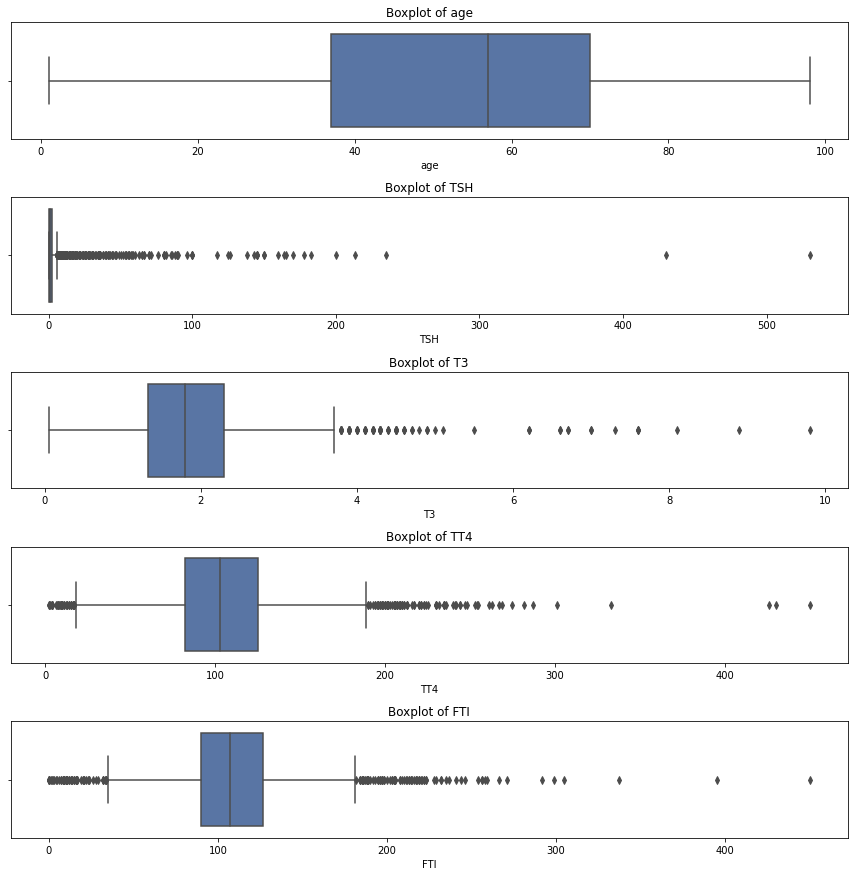

In [ ]:
col = ['age','TSH','T3','TT4','FTI']

fig, ax = plt.subplots(len(col),figsize= (15,15))
sns.set(style="whitegrid")

for i, col in enumerate(hypo[col]):
  sns.boxplot(hypo[col], ax=ax[i])
  ax[i].set_title('Boxplot of {}'.format(col))

plt.subplots_adjust(hspace=0.5)


In [ ]:
# Drop Outliers
q3 = hypo.quantile(0.75)
q1 = hypo.quantile(0.25)

iqr = q3-q1

hypo_outliers = hypo[~((hypo < (q1 - 1.5 * iqr)) |(hypo > (q3 + 1.5 * iqr))).any(axis=1)]

In [ ]:
print(hypo.shape)
print(hypo_outliers.shape)

(1958, 19)
(1460, 19)


**Conclusion** 

The Anomaly in the **Sex column** where we had **'?' value** was replaced by the mode of that column

The Original Data had **3163 records** and         **25 columns** but after removing duplicates and dropping columns such with only one value and the numeric columns with majority of its values are '?'  we ended up with **1958 records** and **19 columns**

From our numerical columns only **Age** did not have outliers,the removal of outliers reduces the occurences of the Hypothroid status to only 1 therefore it might yield wrong results during modelling

In [ ]:
# Import the clean Dataset
hypo.to_csv("hypo_new.csv")

## 6. Exploratory Analysis

In [ ]:
# Load clean Dataset
data = pd.read_csv('hypo_new.csv')

data.drop(['Unnamed: 0'], 1, inplace=True)
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


### **Univarite Analysis**

In [ ]:
# Categorical variables
categorical = []
for i in data.columns:
  if data[i].dtype == 'object':
    categorical.append(i)
categorical

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre']

In [ ]:
# checking the unique values in our categorical var
for i in categorical:
  if data[i].dtype == 'object':
    print(data[i].value_counts())
    print('***************************************')

negative       1845
hypothyroid     113
Name: status, dtype: int64
***************************************
F    1332
M     626
Name: sex, dtype: int64
***************************************
f    1706
t     252
Name: on_thyroxine, dtype: int64
***************************************
f    1937
t      21
Name: query_on_thyroxine, dtype: int64
***************************************
f    1931
t      27
Name: on_antithyroid_medication, dtype: int64
***************************************
f    1887
t      71
Name: thyroid_surgery, dtype: int64
***************************************
f    1811
t     147
Name: query_hypothyroid, dtype: int64
***************************************
f    1819
t     139
Name: query_hyperthyroid, dtype: int64
***************************************
f    1910
t      48
Name: pregnant, dtype: int64
***************************************
f    1877
t      81
Name: sick, dtype: int64
***************************************
f    1933
t      25
Name: tumor, dtype: int6

In [ ]:
# Replace all the f and t to True and False

for i in categorical[2:]:
  data[i] = data[i].str.replace('f','False').str.replace('t','True')

Text(0.5, 1.0, 'Patients with Hypothyroid vs Not with Hypothyroid')

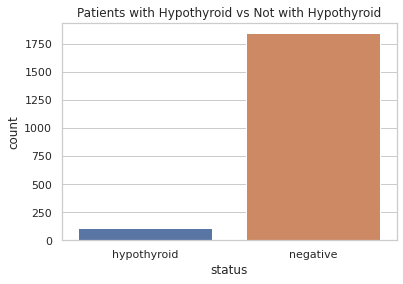

In [ ]:
sns.countplot(data['status'])
plt.title('Patients with Hypothyroid vs Not with Hypothyroid')

Text(0.5, 1.0, 'Gender')

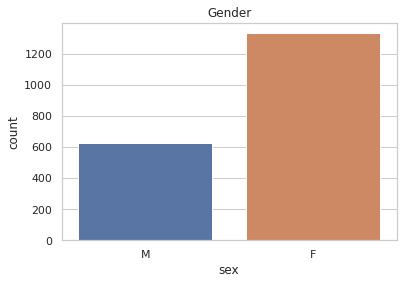

In [ ]:
sns.countplot(data['sex'])
plt.title("Gender")

Text(0.5, 1.0, 'Patients with Goitre')

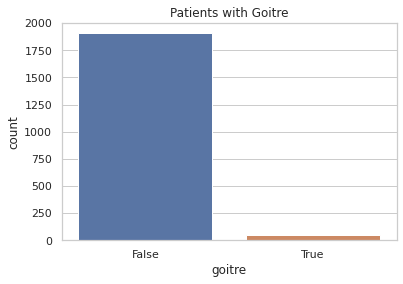

In [ ]:
sns.countplot(data['goitre'])
plt.title("Patients with Goitre")


sex
F    84
M    29
Name: status, dtype: int64


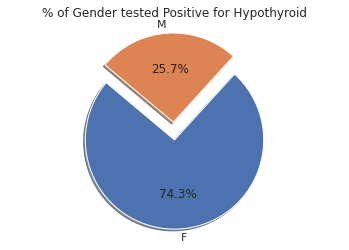

In [ ]:
# Check on the percentage of gender that have tested positive for Hypothyroid
data1 = data[data["status"] == 'hypothyroid']
data1
status = data1['status'].groupby(data1['sex']).count()
print(status)
gender = [ 'F','M']
explode = (0.2, 0)

plt.pie(status, labels= gender,explode= explode, autopct= '%1.1f%%', startangle= 140,shadow = True)
plt.axis('equal')
plt.title('% of Gender tested Positive for Hypothyroid')
plt.show()

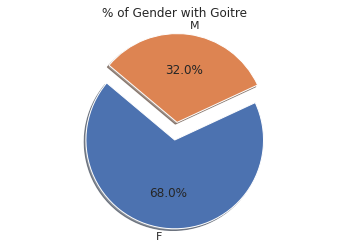

sex
F    1332
M     626
Name: goitre, dtype: int64

In [ ]:
# Check on the percentage of gender with goitre
explode = (0.2, 0)

goitre = data['goitre'].groupby(data['sex']).count()
gender = ['F','M']
goitre

plt.pie(goitre, labels= gender,explode= explode, autopct= '%1.1f%%', startangle= 140,shadow = True)
plt.axis('equal')
plt.title('% of Gender with Goitre')
plt.show()
goitre


Text(0.5, 1.0, 'Patients on Thyroxine')

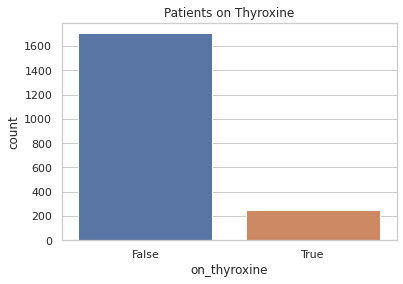

In [ ]:
# Patients on Thyroxine
sns.countplot(data['on_thyroxine'])
plt.title("Patients on Thyroxine")

Text(0.5, 1.0, 'Patients on AntiThyroid Medication')

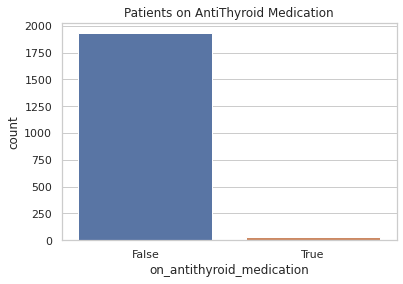

In [ ]:
#Patients on AntiThyroxine
sns.countplot(data['on_antithyroid_medication'])
plt.title("Patients on AntiThyroid Medication")

Text(0.5, 1.0, 'Patients had Thyroid Surgery')

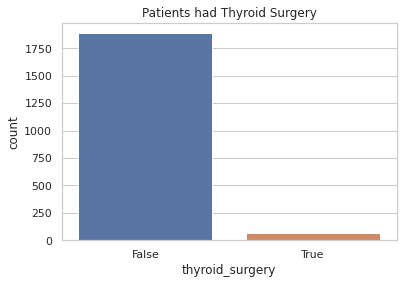

In [ ]:
# Those patients that have had Thyroid Surgery
sns.countplot(data['thyroid_surgery'])
plt.title("Patients had Thyroid Surgery")

**Description**

In [ ]:
#Description of the numeric data

des = data.describe()
des.loc['Range'] = des.loc['max'] - des.loc['min']
des.loc['IQR'] = des.loc['75%'] - des.loc['25%'] 
# appending interquartile range instead of recalculating it
des = des.append(data.reindex(des.columns, axis=1).agg(['skew', 'kurt']))
des

,age,TSH,T3,TT4,T4U,FTI
count,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000
mean,53.523493,5.942926,1.921195,107.294331,0.987467,110.226404
std,19.242773,24.614950,0.953359,44.007499,0.230057,40.296820
min,1.000000,0.000000,0.050000,2.000000,0.000000,0.000000
25%,37.000000,0.000000,1.325000,82.000000,0.850000,90.000000
50%,57.000000,0.700000,1.800000,103.000000,0.960000,107.000000
75%,70.000000,2.200000,2.300000,125.000000,1.070000,126.750000
max,98.000000,530.000000,9.800000,450.000000,2.030000,450.000000
Range,97.000000,530.000000,9.750000,448.000000,2.030000,450.000000
IQR,33.000000,2.200000,0.975000,43.000000,0.220000,36.750000


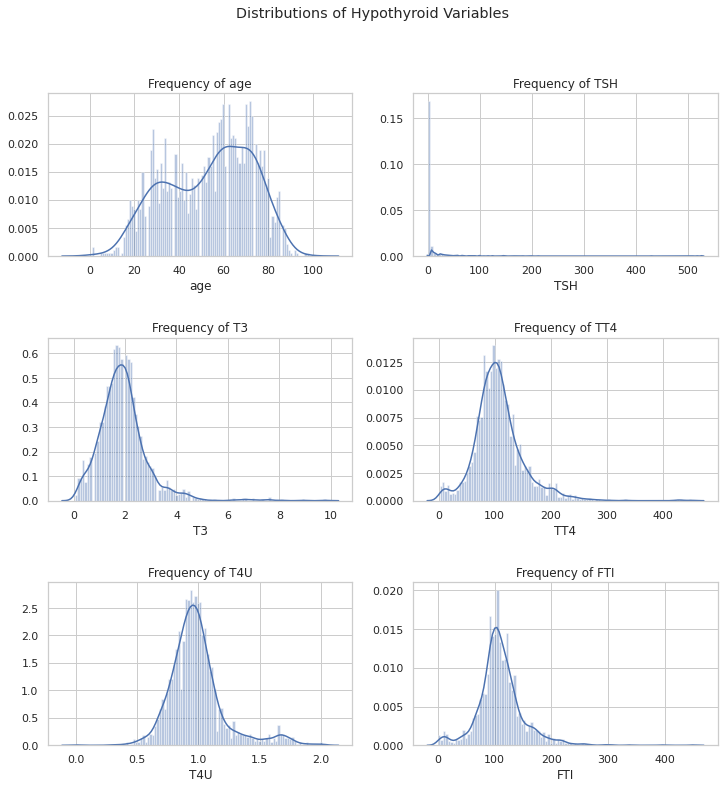

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (12,12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Hypothyroid Variables')

num = data[['age','TSH','T3','TT4','T4U','FTI']]

for ax, values, name in zip(axes.flatten(), num.values.T, num.columns):
    sns.distplot(values, ax=ax, bins=len(np.unique(num.values.T[1]))//2)
    ax.set(title="Frequency of {}".format(name), xlabel=name)

### **Bivariate Analysis**

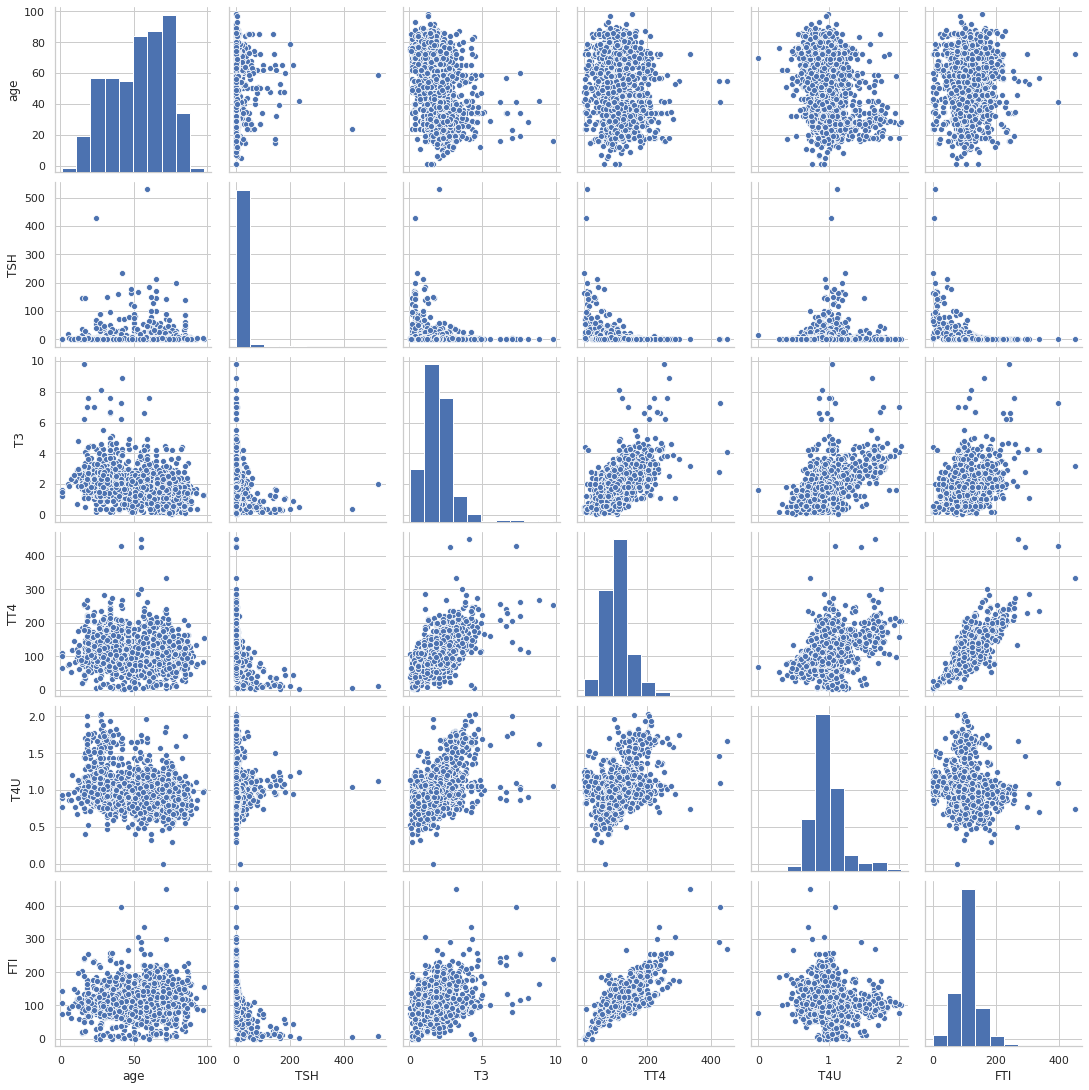

In [ ]:
# Scatter Plots of our Numeric Data
sns.pairplot(data)

In [ ]:
# Convert the Categorical Variables into Numeric
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
for i in categorical:
  data[i] = en.fit_transform(data[i])

In [ ]:
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


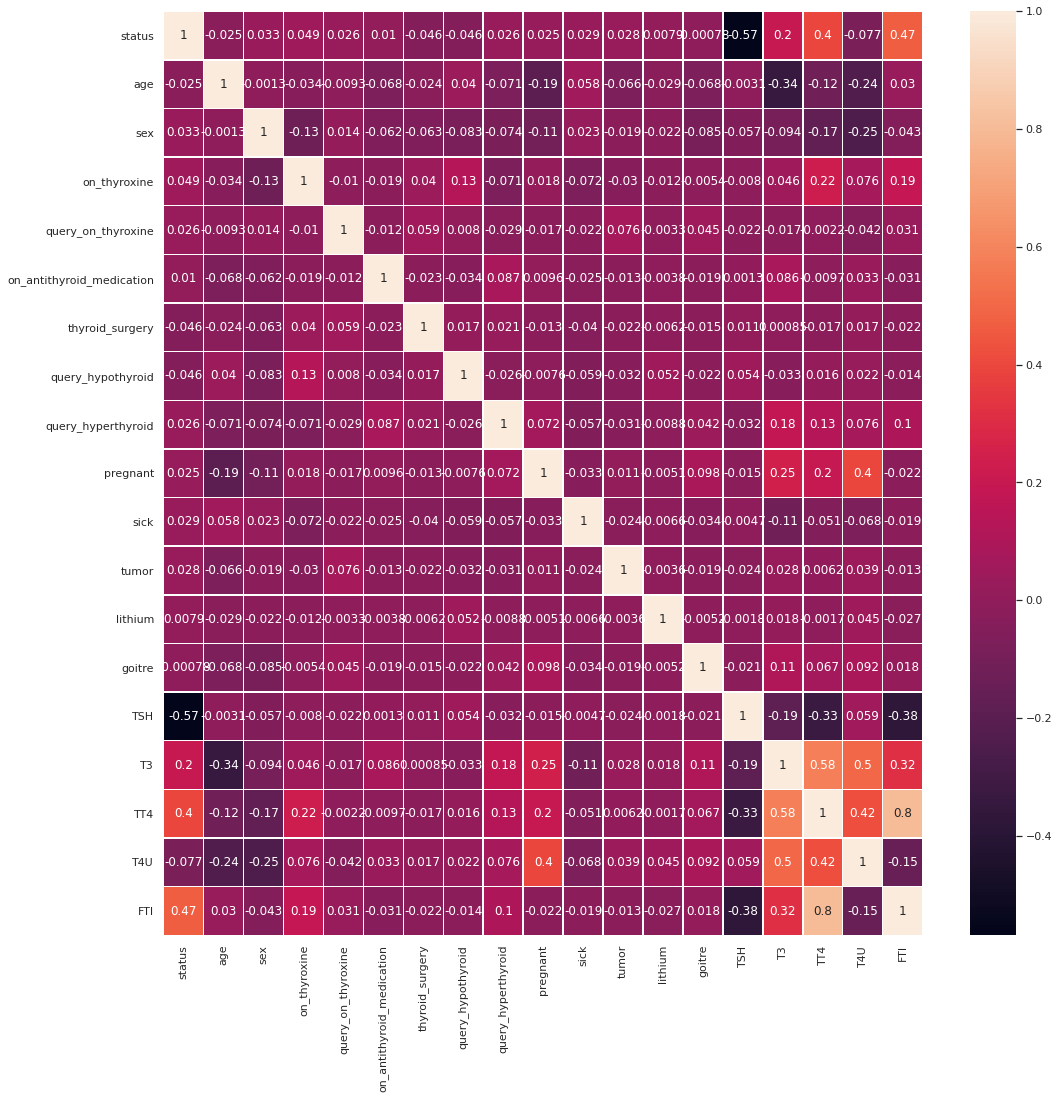

In [ ]:
# A heatmap to show correlation

fig, ax = plt.subplots(figsize=(17,17))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

**Conclusion**

From our Analysis we see most of the Patients have tested Negative for Hypothyroid.
A large amount of those tested are Females, from those who tested positive for hypothroid,the Female Patients are the highest also of the patients, females had the highest percentage of goitre

Alot of the patients did not take Thyroid, antithyroid medication or had undergone thyroid surgery

Most of our numeric data is almost normally distributed expcept for **TSH** which is **positively skewed**.
The **Status** which inicates if a patient has Hypothroid or not has moderate correlation between **TSH** and a weak correlation with **FTI,TT4 and T3** and having very low correlation with the other variables

The Variable **Pregnant** shows low correlation but its above 0.1 between **TT4,T3,T4U**

The Variables **FTI** and **TT4** have a very strong correlation 

## 7. Implementing the Solution

In [ ]:
# Libraries to Implement the Solution
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC,LinearSVC
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn import metrics


##  Decision Trees

### Random Forest

In [ ]:
#Split data into train and test
features = data.columns.to_list()
features.remove('status')

X = data[features].values
y = data['status'].values

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=20)
X

array([[ 72.  ,   1.  ,   0.  , ...,  15.  ,   1.48,  10.  ],
       [ 15.  ,   0.  ,   1.  , ...,  19.  ,   1.13,  17.  ],
       [ 24.  ,   1.  ,   0.  , ...,   4.  ,   1.  ,   0.  ],
       ...,
       [ 77.  ,   1.  ,   0.  , ...,  71.  ,   0.68, 104.  ],
       [ 74.  ,   0.  ,   0.  , ...,  65.  ,   0.48, 137.  ],
       [ 56.  ,   0.  ,   1.  , ..., 139.  ,   0.97, 143.  ]])

**Fit to the Model and Make Prediction**

In [ ]:
clf_rand = RandomForestClassifier(n_estimators= 200, max_depth= 5, max_features= 10, min_samples_split=3)
clf_rand.fit(X_train,y_train)

rf_pred = clf_rand.predict(X_test)

comparison = pd.DataFrame({'Accurate':y_test, 'Predicted':rf_pred})
comparison.describe()

,Accurate,Predicted
count,392.000000,392.000000
mean,0.933673,0.931122
std,0.249170,0.253569
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Evaluate the Model

In [ ]:
print("The Accuracy is", accuracy_score(y_test,rf_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,rf_pred))

The Accuracy is 0.9923469387755102
[[ 25   1]
 [  2 364]]


Feature Importance

In [ ]:
importance = list(clf_rand.feature_importances_)

feature_importance = [(features, round(importance,2)) for feature, importance in zip(features, importance)]

#Sort our features from the most important
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse= True)

# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

Text(0, 0.5, 'Importance')

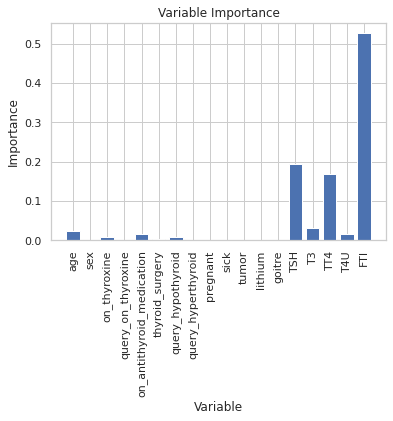

In [ ]:
# Visualize
xlabels = list(range(len(importance)))

plt.bar(xlabels, importance, orientation = 'vertical')
plt.xticks(xlabels, features, rotation =90)
plt.title("Variable Importance")
plt.xlabel("Variable")
plt.ylabel("Importance")

### Gradient Boosting

**Fit Model and Make Prediction**

In [ ]:
no_of_trees = 100
clf_gb = GradientBoostingClassifier(learning_rate= 0.3, n_estimators=no_of_trees, min_samples_split=3,max_depth=10)
clf_gb.fit(X_train,y_train)

gb_pred = clf_gb.predict(X_test)

**Evaluate the Model**

RMSE is: 0.08748177652797065
Accuracy is: 0.9923469387755102
[[ 25   1]
 [  2 364]]


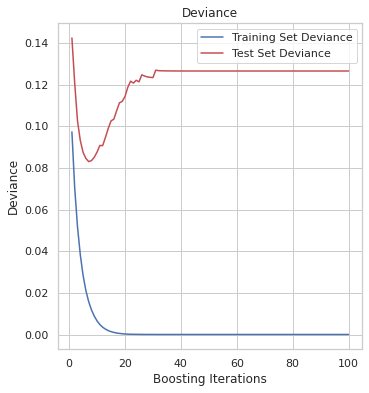

In [ ]:
print("RMSE is:",np.sqrt(metrics.mean_squared_error(y_test, gb_pred)))
print("Accuracy is:", accuracy_score(y_test, gb_pred))
print(confusion_matrix(y_test, gb_pred))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')

plt.plot(np.arange(no_of_trees) + 1, clf_gb.train_score_, 'b-',
        label='Training Set Deviance')


test_score = np.zeros((no_of_trees), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(clf_gb.staged_decision_function(X_test)):
    test_score[i] = clf_gb.loss_(y_test, y_pred)

plt.plot(np.arange(no_of_trees) + 1, test_score, 'r-',
        label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()


**Feature Importance**

Text(0, 0.5, 'Importance')

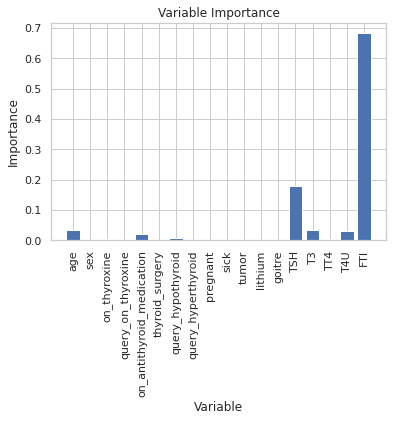

In [ ]:
importance2 = list(clf_gb.feature_importances_)

# Visualize
xlabels = list(range(len(importance2)))

plt.bar(xlabels, importance2, orientation = 'vertical')
plt.xticks(xlabels, features, rotation =90)
plt.title("Variable Importance")
plt.xlabel("Variable")
plt.ylabel("Importance")

## SVM

In [ ]:
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


In [ ]:
thyroid = data[['FTI','T4U','TSH','T3','age','on_antithyroid_medication','sex','on_thyroxine','thyroid_surgery']]
y = data['status']

In [ ]:
#Use PCA to reduce the features to 2 so that we can plot in a 2-D plane
pca = PCA(n_components=2)
X = pca.fit_transform(thyroid)
X.shape

(1958, 2)

In [ ]:
#Split the data into train and test
S_train,S_test,t_train,t_test = train_test_split(X,y, test_size=0.2, random_state=0)

### Linear SVM 

In [ ]:
lin_svc = SVC(kernel='linear')
clf_model = lin_svc.fit(S_train,t_train)

Visualize

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.5):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


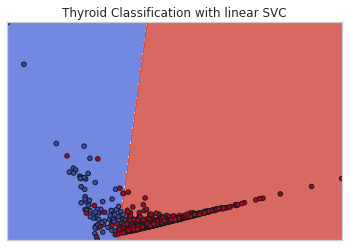

In [ ]:
fig, ax = plt.subplots()
# title for the plots
title = ('Thyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Evaluate Model**

In [ ]:
ln_pred = clf_model.predict(S_test)

print("Accuracy is:", accuracy_score(t_test,ln_pred))
print(confusion_matrix(t_test,ln_pred))


Accuracy is: 0.9795918367346939
[[ 23   5]
 [  3 361]]


### Polynomial SVC

In [ ]:
%%time
poly_scv = SVC(kernel = 'poly', degree=2, gamma='auto')
poly_model = poly_scv.fit(S_train,t_train)

CPU times: user 4min 43s, sys: 21.3 ms, total: 4min 43s
Wall time: 4min 43s


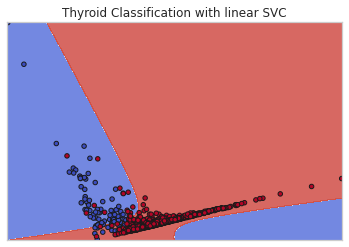

In [ ]:
# Visualize the Classification

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = poly_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Thyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, poly_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Evaluate the Model**

In [ ]:
pl_pred = poly_scv.predict(S_test)

print("The Accuracy is:",accuracy_score(t_test,pl_pred))
print(confusion_matrix(t_test,pl_pred))

The Accuracy is: 0.9770408163265306
[[ 23   5]
 [  4 360]]


### Radial Basis Function SVC

In [ ]:
%%time

rbf_svc = SVC(kernel = 'rbf', gamma=2**3, C = 2**5)
rbf_model = rbf_svc.fit(S_train, t_train)

CPU times: user 124 ms, sys: 1.99 ms, total: 126 ms
Wall time: 129 ms


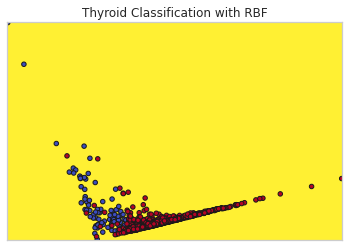

In [ ]:
# Visualize the Classification

# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.5):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbf_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Thyroid Classification with RBF')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, rbf_model, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Evaluate the Model**

In [ ]:
rbf_pred = rbf_svc.predict(S_test)


print("The Accuracy is:",accuracy_score(t_test,rbf_pred))
print(confusion_matrix(t_test,rbf_pred))

The Accuracy is: 0.9285714285714286
[[  0  28]
 [  0 364]]


### Sigmoid SVC

In [ ]:
sig_svc = SVC(kernel= 'sigmoid')
sig_model = sig_svc.fit(S_train,t_train)


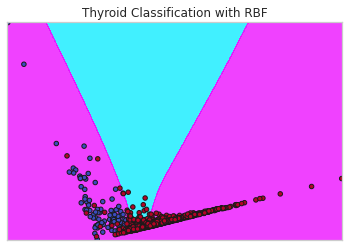

In [ ]:
# Visualize 

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = sig_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Thyroid Classification with RBF')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, sig_model, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Evaluate the Model**

In [ ]:
sig_pred = sig_svc.predict(S_test)


print("The Accuracy is:",accuracy_score(t_test,sig_pred))
print(confusion_matrix(t_test,sig_pred))

The Accuracy is: 0.8801020408163265
[[  0  28]
 [ 19 345]]


### The Best Model (Linear SVC)

In [ ]:
# Features and Labels
X = data.drop('status',1)
y = data['status']

S_train,S_test,t_train,t_test = train_test_split(X,y, test_size=.2, random_state=0)

**Fit the Model and Make Prediction**

In [ ]:
lin = SVC(kernel='linear')
clf_lin = lin.fit(S_train,t_train)

ln_pred = lin.predict(S_test)

**Evaluate the Model**

In [ ]:
# since we are using all features 
print("The Accuracy:",accuracy_score(t_test,ln_pred))
print(confusion_matrix(t_test,ln_pred))

The Accuracy: 0.9821428571428571
[[ 24   4]
 [  3 361]]


## 8. Challenging the solution

From our Analysis our Decision Trees, both **Random Forest** and **Gradient Boosting** give an accuracy of **99.23%.** Which as per our metric of success it can correctly claasifiers a patients who has thyroid and the one who hasn't

From our Feature Importance plot we see that the follwong features have the highest importance


1.   FTI
2.   TSH
3.   T4U
4.   T3
5.   age
6.   on antithyroid medication

In Support Vectors, the features listed above were included and an addition of others that were thought would help improve the accuracy of classification which were:
1.  sex
2.  on thyroxine
3.  thyroid surgery

For the Support Vector Machine, the Linear SVC had the highest accuracy, with an **accuracy of 97.79%**

The **Polynomial SVC** had an accuracy of **97.7%**, it could have achieved better accuracy but beyond degree =2, the classifier took over an hour to process thus there were **time constraints**

The **Radial Basis Function SVC** misclassified most of the data by putting them in one class even after tuning the hyperparameters.It achieved **93.6% accuracy**

The **Sigmoid Classifier** had the worst score in accuracy of **88%**.As per the metric of success the Polynomial SVC and the Linear SVC could be used for thryoid classifiation in patients.

With **Linear SVC** having the best accuracy, all the features were included and the accuracy increased to **98.21%**

Compared to the Decision Trees, both Random Forest and Gradient Boosting have the highest accuracy, therefore the Decision Trees are best suited  for this classification